In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=15,6
import math
import warnings
warnings.filterwarnings('ignore')

In [34]:
df=pd.read_csv("AirPassengers.csv")
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [35]:
df["Month"].head()

0    1949-01
1    1949-02
2    1949-03
3    1949-04
4    1949-05
Name: Month, dtype: object

In [36]:
df["Month"]=df["Month"].apply(lambda x:dt(int(x[:4]),int(x[5:]),15))
df=df.set_index("Month")                              
df.head()                            

,#Passengers
Month,
1949-01-15,112
1949-02-15,118
1949-03-15,132
1949-04-15,129
1949-05-15,121


In [37]:
ts=df["#Passengers"]


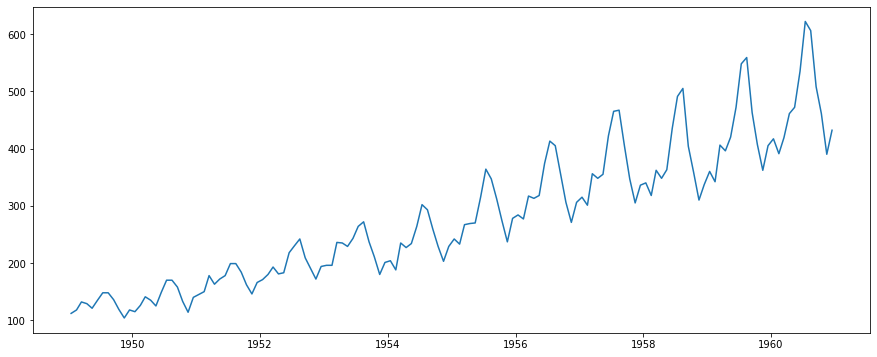

In [38]:
plt.plot(ts)

In [39]:
ts_log=np.log(ts)

In [40]:
#Stationary check

In [41]:
def test_stationarity(timeseries):
    #determining rolling statisticks
    
    rolmean=timeseries.rolling(window=52,center=False).mean()
    rolstd=timeseries.rolling(window=52,center=False).std()
    #plot rolling statisticks
    orig=plt.plot(timeseries,color='blue',label="originga")
    mean=plt.plot(rolmean,color='red',label="Rolling Mean")
    std=plt.plot(rolstd,color="black",label="Rolling Std")
    plt.legend(loc='best')
    plt.title("Rolling Mean and Rolling Standard Deviation")
    plt.show(block=False)
    #perform dickey-fuller test
    print("Results of Dickey-Fuller Test:")
    dftest=adfuller(timeseries,autolag="AIC")
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lag values used','Number of observations used'])
    for key,value in dftest[4].items():
        dfoutput['critical value %s'%key]=value
        print(dfoutput)

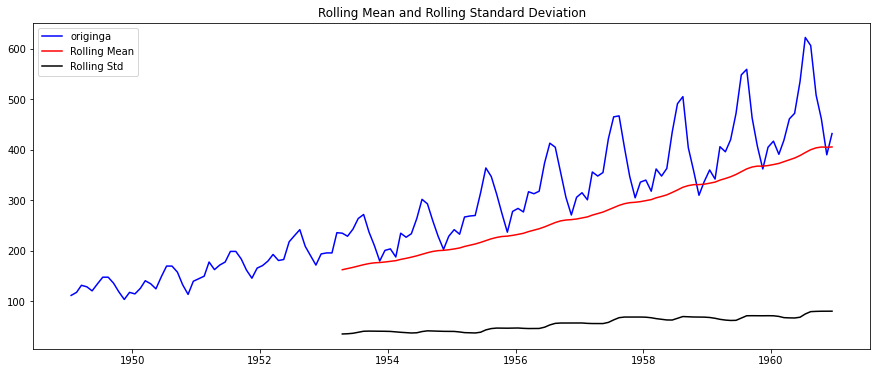

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lag values used                13.000000
Number of observations used    130.000000
critical value 1%               -3.481682
dtype: float64
Test Statistic                   0.815369
p-value                          0.991880
#Lag values used                13.000000
Number of observations used    130.000000
critical value 1%               -3.481682
critical value 5%               -2.884042
dtype: float64
Test Statistic                   0.815369
p-value                          0.991880
#Lag values used                13.000000
Number of observations used    130.000000
critical value 1%               -3.481682
critical value 5%               -2.884042
critical value 10%              -2.578770
dtype: float64


In [42]:
test_stationarity(df["#Passengers"])

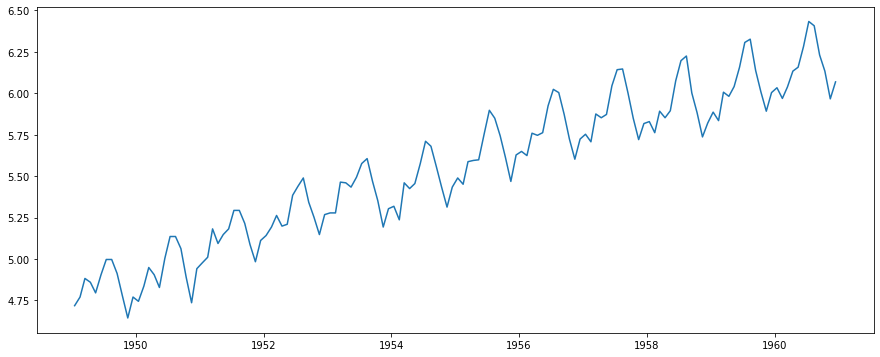

In [44]:
plt.plot(ts_log)

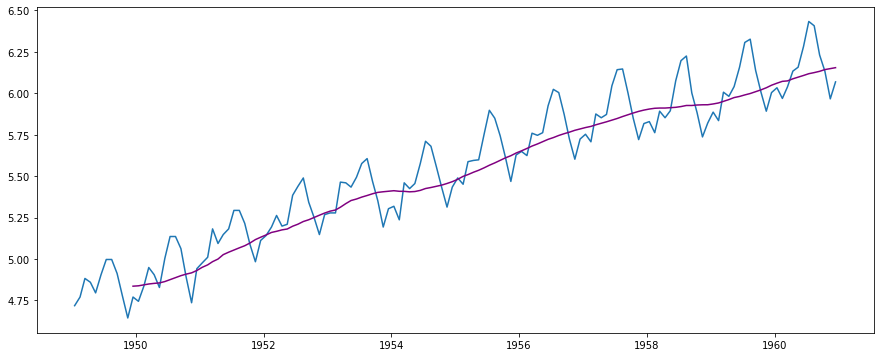

In [45]:
movingAverage=ts_log.rolling(window=12).mean()
movingStd=ts_log.rolling(window=12).std()
plt.plot(ts_log)
plt.plot(movingAverage,color='purple')

In [47]:
ts_log_mv_diff=ts_log-movingAverage
ts_log_mv_diff.head(10)
ts_log_mv_diff.dropna(inplace=True)
ts_log_mv_diff.head(10)

Month
1949-12-15   -0.065494
1950-01-15   -0.093449
1950-02-15   -0.007566
1950-03-15    0.099416
1950-04-15    0.052142
1950-05-15   -0.027529
1950-06-15    0.139881
1950-07-15    0.260184
1950-08-15    0.248635
1950-09-15    0.162937
Name: #Passengers, dtype: float64

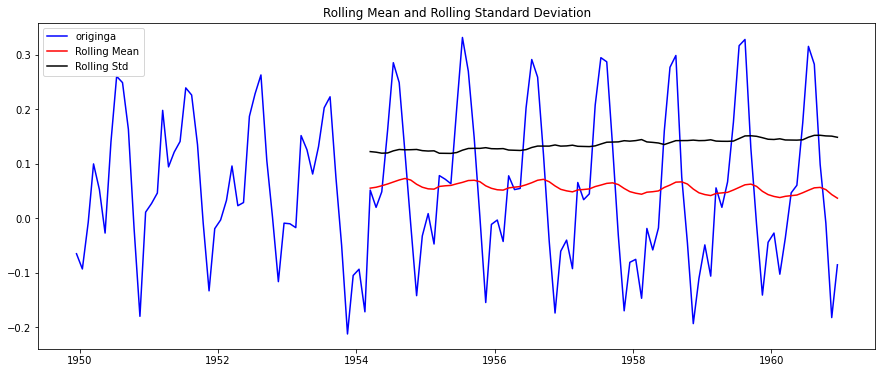

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lag values used                13.000000
Number of observations used    119.000000
critical value 1%               -3.486535
dtype: float64
Test Statistic                  -3.162908
p-value                          0.022235
#Lag values used                13.000000
Number of observations used    119.000000
critical value 1%               -3.486535
critical value 5%               -2.886151
dtype: float64
Test Statistic                  -3.162908
p-value                          0.022235
#Lag values used                13.000000
Number of observations used    119.000000
critical value 1%               -3.486535
critical value 5%               -2.886151
critical value 10%              -2.579896
dtype: float64


In [46]:
test_stationarity(ts_log_mv_diff)

In [ ]:
#since the test statistic is lessthan the critical value of 1%,so reject null hypothesis.
